In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

could also test for correlation and make corr_matrix

In [3]:
file = "combined.csv"
df = pd.read_csv(file, index_col=0)

make histograms for different wavelengths / bands of wavelengths 

showing distribution of the 3 classes at different values of attenuation

choose the wavelengths with the least overlap / greatest contrast between classes

(is there a way to measure this analytically?)

could prioritise contrast between 2 classes over others 

e.g. prioritise contrast between 3 (neoplasia) and 2 (NDBE)

over 1 (squamous) & 2 (NDBE)

In [4]:
squamous = df.loc[df['label']==1]
ndbe = df.loc[df['label']==2]
neoplasia = df.loc[df['label']==3]

In [5]:
# squamous[['feature_1','label']]
print(f"1:{len(squamous)}, 2:{len(ndbe)}, 3:{len(neoplasia)}")

1:159, 2:320, 3:236


<Axes: >

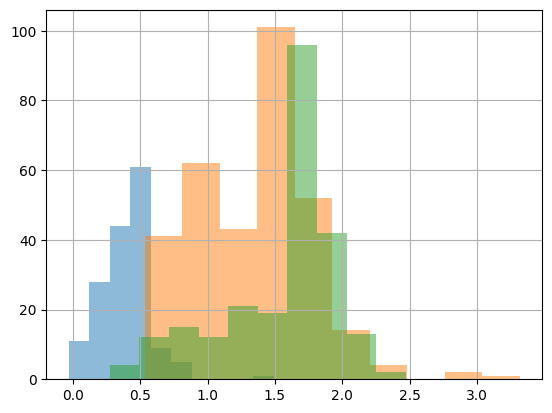

In [33]:
# make histo plot for each class (Rohit, 2014)
squamous['feature_1'].hist(alpha=0.5)
ndbe['feature_1'].hist(alpha=0.5)
neoplasia['feature_1'].hist(alpha=0.5)


In [29]:
df[['feature_1','label']]


,variable,value
0,feature_1,1.31130
1,feature_1,1.87500
2,feature_1,1.37820
3,feature_1,2.17140
4,feature_1,0.73976
...,...,...
310305,label,3.00000
310306,label,3.00000
310307,label,2.00000
310308,label,1.00000


In [99]:
# seaborn plots (Rohit, 2014), (Anon, 2022)
# for each feature / wavelength - create displots
# want to have 4 paired subplots per image instead - 109 images as opposed to ~800
for i in range(1,434):
    plot = sns.histplot(df[[f'feature_{i}','label']], x=f'feature_{i}', hue='label', multiple='dodge', 
                        shrink=.75, bins=20, stat='count', element="step")
    plot.get_figure().savefig(f'feature_select/histoplots/feature_{i}_hist.png')
    plt.close()

    plot = sns.displot(df[[f'feature_{i}','label']], x=f'feature_{i}', hue='label', multiple='layer', 
                    kind='kde', fill=True)
    plot.savefig(f'feature_select/histoplots/feature_{i}_kde.png')
    plt.close()




In [7]:
# code references (Anon, 2022), (Anon, 2023)

num_figures = 109
# loop over the figures
for f in range(num_figures):
    # f=108
    # create a new figure with four subplots
    fig, axs = plt.subplots(2, 2, figsize=(25, 15))
    # make 1d
    axs = axs.ravel()

    # loop over the pairs of histograms and displots for this figure
    for i in range(4):
        j = (f * 4) + i + 1
        print(j)
        if j >= 434:
            break
        
        # create the histogram subplot
        sns.histplot(df[[f'feature_{j}','label']], x=f'feature_{j}', hue='label', multiple='dodge', 
                        shrink=.75, bins=20, stat='count', element="step", ax=axs[i])
        axs[i].set_xlabel(f'Feature {j}', fontsize=20)
        axs[i].set_ylabel(f'Feature {j}', fontsize=20)
        axs[i].tick_params(axis='x', labelsize=15)
        axs[i].tick_params(axis='y', labelsize=15)

    # save the figure
    plt.savefig(f'feature_select/subplots/feature_{j-3}to{j}.png')
    plt.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
# figures contain features from (figure_num*4)+1 
selected_figures = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                    21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
                    39,40,41,42,43,44,45,46,47,48,49,50,51,52]

# figures that MAY be decent - noisy but different peaks
possible_features = [53,54,56,57,58,59,60,61,62,63,64,65]

# decent features - eyeballed

# observations
The histograms clearly show why classification of neoplasia against squamous tissue is so much easier than against NDBE

But from figure 65 (feature_261), NDBE and Squamous begin to become less distinguishable, as NDBE peaks at similar points as squamous. If NDBE and neoplasia began to increase in contrast here, it could be worth including these features too, to increase recall of neoplasia potentially, but NDBE still produces noise with neoplasia here.

From figure 87 (feature_349), all 3 classes are completely indistinguishable from each other on the histograms. One of the noisiest wavelengths - should disregard these wavelengths / features

From figure 98 (feature_393), squamous begins to seperate from NDBE and neoplasia again, but there still remains noise between NDBE and neoplasia

# Conclusion
Will use just the features / wavelengths from figures 0 through to 52. Experiment with incuding figures 53 to 65, to see if this extra data (albeit slightly noisier) produces any positive effects
